In [87]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# plotting style (any color scheme is fine, I used dark mode)
plt.style.use('dark_background')

pd.options.mode.chained_assignment = None

In [88]:
# URL page we will be scraping
url = "https://www.basketball-reference.com/teams/GSW"
html = urlopen(url)
soup = BeautifulSoup(html)

# use findALL() to get the column headers
soup.findAll('tr', limit=2)

# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

# creating the dataframe which will have all the required data
df = pd.DataFrame(player_stats, columns = headers)
df["seasons"] = 2021 - np.arange(76)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 

df = df.iloc[::-1]
#some of the stats didnt exist for the first 4 seasons of the warriors franchise
df = df[4:]
df.reset_index(drop=True, inplace=True)
df[:5]


,seasons,Lg,Team,W,L,W/L%,Finish,SRS,,,...,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,,,Playoffs,Coaches,Top WS
0,1950,NBA,Philadelphia Warriors*,40,26,.606,1st of 6,3.40,,,...,13.8,84.8,-0.3,81.0,-4.1,,,Lost E. Div. Semis,E. Gottlieb (40-26),P. Arizin (13.7)
1,1951,NBA,Philadelphia Warriors*,33,33,.500,4th of 5,-1.08,,,...,9.7,89.5,2.6,90.8,3.9,,,Lost E. Div. Semis,E. Gottlieb (33-33),P. Arizin (16.0)
2,1952,NBA,Philadelphia Warriors,12,57,.174,5th of 5,-7.75,,,...,14.3,83.9,-4.1,91.4,3.7,,,,E. Gottlieb (12-57),N. Johnston (15.3)
3,1953,NBA,Philadelphia Warriors,29,43,.403,4th of 5,-1.89,,,...,5.8,86.7,-0.8,89.0,1.5,,,,E. Gottlieb (29-43),N. Johnston (18.3)
4,1954,NBA,Philadelphia Warriors,33,39,.458,4th of 5,-0.19,,,...,4.8,89.6,-0.2,89.9,0.1,,,,E. Gottlieb (33-39),N. Johnston (15.4)


 # Win Share bar plots

In [89]:
# cleaning the data of win share leaders (Top WS column in our dataframe)
player_names = []
player_ws = []
for c in df['Top WS']:
#     print(c.split()[2].strip('()'), c.split()[:2])
    d = c.split()[0] + c.split()[1] 
    player_ws += [c.split()[2].strip('()')]
    player_names += [d]
player_ws = np.array(player_ws, dtype=float)
print(player_names, player_ws)
player_names = np.array(player_names)
df['WS'] = player_ws
df['WS player'] = player_names

['P.Arizin', 'P.Arizin', 'N.Johnston', 'N.Johnston', 'N.Johnston', 'N.Johnston', 'N.Johnston', 'N.Johnston', 'P.Arizin', 'W.Chamberlain', 'W.Chamberlain', 'W.Chamberlain', 'W.Chamberlain', 'W.Chamberlain', 'W.Chamberlain', 'R.Barry', 'R.Barry', 'R.LaRusso', 'J.Mullins', 'J.Lucas', 'J.Lucas', 'J.Mullins', 'R.Barry', 'R.Barry', 'R.Barry', 'R.Barry', 'R.Barry', 'R.Barry', 'J.Lucas', 'S.Parker', 'B.King', 'B.King', 'J.Carroll', 'P.Short', 'P.Short', 'S.Floyd', 'S.Floyd', 'R.Higgins', 'C.Mullin', 'C.Mullin', 'C.Mullin', 'C.Mullin', 'T.Hardaway', 'L.Sprewell', 'T.Hardaway', 'B.Armstrong', 'L.Sprewell', 'D.Marshall', 'D.Marshall', 'D.Marshall', 'A.Jamison', 'A.Jamison', 'A.Jamison', 'E.Dampier', 'J.Richardson', 'J.Richardson', 'A.Biedriņš', 'M.Ellis', 'A.Biedriņš', 'C.Maggette', 'S.Curry', 'D.Lee', 'S.Curry', 'S.Curry', 'S.Curry', 'S.Curry', 'S.Curry', 'K.Durant', 'K.Durant', 'M.Chriss', 'S.Curry', 'S.Curry'] [13.7 16.  15.3 18.3 15.4 13.9 13.7 11.3 13.  17.  18.8 23.1 20.9 25.
  7.5 10.4 14.

## TODO: make graphs aesthetic (check seaborn documentation and examples)

### Win share frequency plot to display the number of times a player was the team leader in win shares

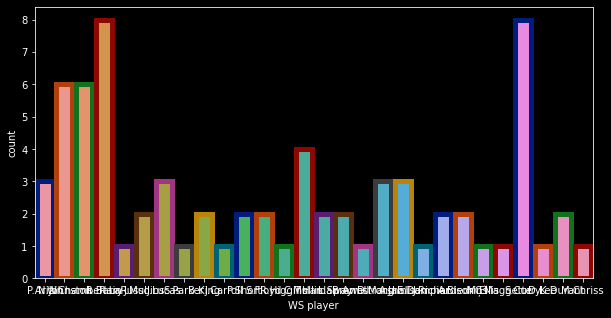

28


In [90]:
plt.hist(df['WS player'], bins=48)
sns.countplot(x="WS player", data=df, linewidth=5, edgecolor=sns.color_palette("dark", 24))
plt.show()
# print(df['WS name'])
print(len(np.unique(player_names)))

# TODO: show the mean win share of the win share leaders 

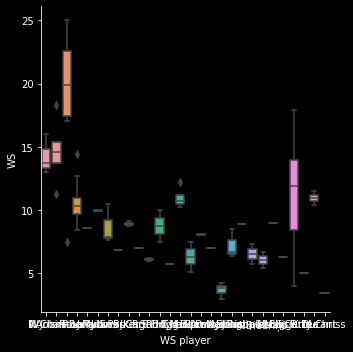

In [91]:
sns.catplot(x="WS player", y="WS", kind="box", data=df)
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

## Splitting data into two subsets: 
## i) Seasons Curry played for Warrior
## ii) Seasons Curry didn't play for Warrior

In [92]:
# converting data into numeric form as it's text by default

numeric_cols = ['W', 'L', 'W/L%', 'SRS', 'Pace', 'Rel Pace', 'ORtg', 'Rel ORtg', 'DRtg', 'Rel DRtg']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], downcast="float")

In [93]:
# indices of the seasons curry played for bulls
A = np.array([59, 60, 62, 63, 64, 65, 66, 67, 68, 71])

# indices of the seasons mj didn't play for bulls
B = np.arange(4,72)
B = np.array([i for i in B if i not in A])

dfa = df.loc[A, :]
dfb = df.loc[B, :]

# Analysis of team stats

## 1. Curry's impact on Win Percentage

In [94]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'W/L%'

mean_stat_with_curry = np.mean(dfa[stat_name])
mean_stat_without_curry = np.mean(dfb[stat_name])
print(mean_stat_with_curry, mean_stat_without_curry)

print(ttest_ind(dfa[stat_name], dfb[stat_name]))

0.67770004 0.4582414
Ttest_indResult(statistic=4.635821063372834, pvalue=1.7287719277728018e-05)


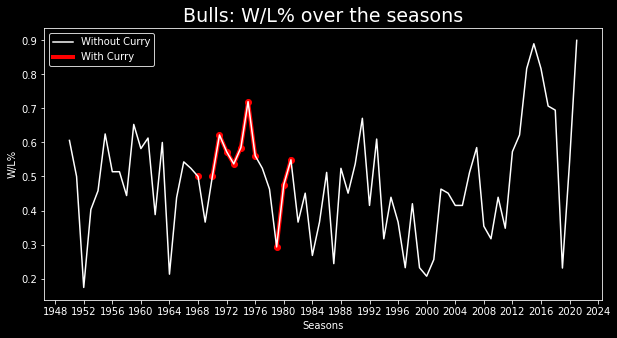

In [95]:
# size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='white')
plt.scatter(df['seasons'][18], df[stat_name][18], color='#ff0000')
plt.scatter(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000')
plt.plot(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000', lw=4, zorder=-1)
plt.scatter(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000')
plt.plot(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without Curry', 'With Curry'])
plt.xlabel("Seasons")
plt.ylabel("{}".format(stat_name))
plt.title("Bulls: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.4)

plt.show()

## 2. Curry's impact on Simple Rating System

In [96]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'SRS'

mean_stat_with_curry = np.mean(dfa[stat_name])
mean_stat_without_curry = np.mean(dfb[stat_name])
print(mean_stat_with_curry, mean_stat_without_curry)

print(ttest_ind(dfa[stat_name], dfb[stat_name]))

5.748 -1.1986207
Ttest_indResult(statistic=5.234126074594155, pvalue=1.847997517636719e-06)


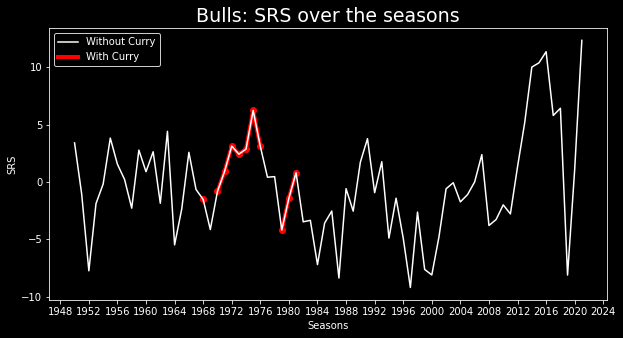

In [97]:
# size of the plot generated
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='white')
plt.scatter(df['seasons'][18], df[stat_name][18], color='#ff0000')
plt.scatter(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000')
plt.plot(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000', lw=4, zorder=-1)
plt.scatter(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000')
plt.plot(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without Curry', 'With Curry'])
plt.xlabel("Seasons")
plt.ylabel("{}".format(stat_name))
plt.title("Bulls: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.4)

plt.show()

## 3. Curry's impact on Relative Offensive Rating

In [98]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'Rel ORtg'

mean_stat_with_curry = np.mean(dfa[stat_name])
mean_stat_without_curry = np.mean(dfb[stat_name][4:])
print(mean_stat_with_curry, mean_stat_without_curry)

print(ttest_ind(dfa[stat_name], dfb[stat_name]))

3.9500003 -0.70000005
Ttest_indResult(statistic=4.464173879963174, pvalue=3.214540242589494e-05)


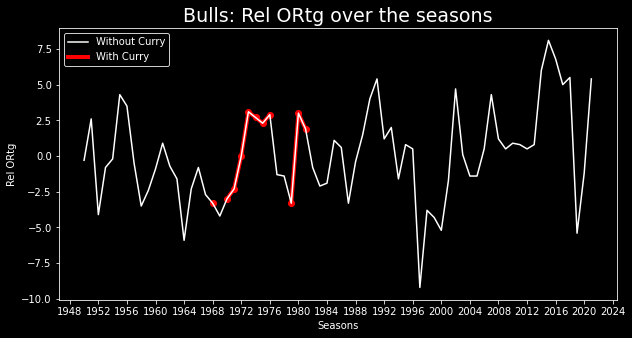

In [99]:
# size of the plot generated
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='white')
plt.scatter(df['seasons'][18], df[stat_name][18], color='#ff0000')
plt.scatter(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000')
plt.plot(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000', lw=4, zorder=-1)
plt.scatter(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000')
plt.plot(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without Curry', 'With Curry'])
plt.xlabel("Seasons")
plt.ylabel("{}".format(stat_name))
plt.title("Bulls: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.4)

plt.show()

## 4. Curry's impact on Relative Defensive Rating

In [100]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'Rel DRtg'

mean_stat_with_curry = np.mean(dfa[stat_name])
mean_stat_without_curry = np.mean(dfb[stat_name])
print(mean_stat_with_curry, mean_stat_without_curry)

print(ttest_ind(dfa[stat_name], dfb[stat_name]))

-1.8700001 0.8482759
Ttest_indResult(statistic=-2.7348814980402216, pvalue=0.00800528928495319)


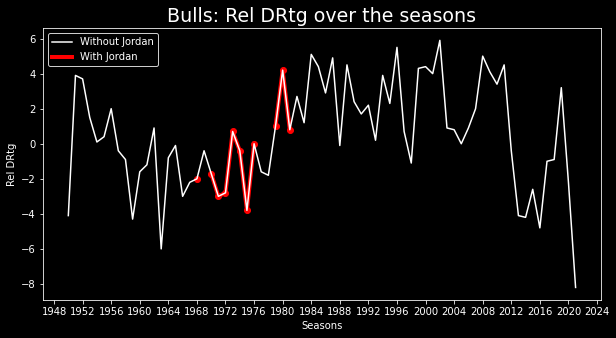

In [101]:
# size of the plot generated
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='white')
plt.scatter(df['seasons'][18], df[stat_name][18], color='#ff0000')
plt.scatter(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000')
plt.plot(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000', lw=4, zorder=-1)
plt.scatter(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000')
plt.plot(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without Jordan', 'With Jordan'])
plt.xlabel("Seasons")
plt.ylabel("{}".format(stat_name))
plt.title("Bulls: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.4)

plt.show()